<center>
    <h1 style="font-family: Arial, sans-serif; font-size: 36px; color: #2F4F4F;">EDA : Exploratory Data Analysis</h1>
    <h2 style="font-family: Arial, sans-serif; font-size: 30px; color: #2F4F4F;">Amazon Customer Behavior Analysis</h2>
</center>

<center><br><br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Amazon_logo.svg/1280px-Amazon_logo.svg.png" width=35%  >
</center><br> <br>

<center>
 <h3 style="font-family: Arial, sans-serif; font-size: 32px; background-color: #FFD700; color: #2F4F4F; display: inline-block; padding: 10px;">1. Problem Statement</h3>
 </center>

- **Data Name** --  Amazon Data
- **Source** --  Kaggle.com
- This is a dataset collected for analyzing the behavioral analysis of Amazon's consumers consists of a comprehensive collection of customer interactions,browsing patterns within the Amazon ecosystem. It includes a wide range of variables such as customer demographics, user interaction, and reviews. The dataset aims to provide insights into customer preferences, shopping habits, and decision-making processes on the Amazon platform. By analyzing this dataset, researchers and analysts can gain a deeper understanding of consumer behavior, identify trends, optimize marketing strategies, and improve the overall customer experience on Amazon.
- This EDA attempts to analyze customer behavior and the relationships between various features within the dataset.



<center>
 <h3 style="font-family: Arial, sans-serif; font-size: 32px; background-color: #FFD700; color: #2F4F4F; display: inline-block; padding: 10px;">2. Import Libraries</h3>
 </center>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy
from scipy.stats import spearmanr
import statistics
from datetime import timedelta
import warnings
warnings.simplefilter("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input\Amazon Customer Behavior Survey.csv


<center>
 <h3 style="font-family: Arial, sans-serif; font-size: 32px; background-color: #FFD700; color: #2F4F4F; display: inline-block; padding: 10px;">3. Loading Data</h3>
 </center>

In [3]:
data = pd.read_csv("/kaggle/input/Amazon Customer Behavior Survey.csv")
print("Data Shape >>",data.shape)
data.head(5)

Data Shape >> (602, 23)


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


<center>
 <h3 style="font-family: Arial, sans-serif; font-size: 32px; background-color: #FFD700; color: #2F4F4F; display: inline-block; padding: 10px;">4. Data Description</h3>
 </center>
<hr>


<br>

- The dataset consists of the following features:

<br>

|ID|Feature name|Feature description|
|:--|:--|:--|
|1|**Timestamp** |Date/Time|
|2|**age** |age|
|3|**Gender** | gender|
|4|**Purchase_Frequency** |How frequently do you make purchases on Amazon? |
|5|**Purchase_Categories** |What product categories do you typically purchase on Amazon?|
|6|**Personalized_Recommendation_Frequency** |Have you ever made a purchase based on personalized product recommendations from Amazon?|
|7|**Browsing_Frequency** |How often do you browse Amazon's website or app? |
|8|**Product_Search_Method** |How do you search for products on Amazon?|
|9|**Search_Result_Exploration** |Do you tend to explore multiple pages of search results or focus on the first page?|
|10|**Customer_Reviews_Importance** |How important are customer reviews in your decision-making process?|
|11|**Add_to_Cart_Browsing** |Do you add products to your cart while browsing on Amazon?|
|12|**Cart_Completion_Frequency** |How often do you complete the purchase after adding products to your cart?|
|13|**Cart_Abandonment_Factors** |What factors influence your decision to abandon a purchase in your cart? |
|14|**Saveforlater_Frequency** |Do you use Amazon's "Save for Later" feature, and if so, how often?|
|15|**Review_Left** |Have you ever left a product review on Amazon?|
|16|**Review_Reliability** |How much do you rely on product reviews when making a purchase?|
|17|**Review_Helpfulness** |Do you find helpful information from other customers' reviews?|
|18|**Personalized_Recommendation_Frequency** |How often do you receive personalized product recommendations from Amazon?|
|19|**Recommendation_Helpfulness** |Do you find the recommendations helpful?|
|20|**Rating_Accuracy** |How would you rate the relevance and accuracy of the recommendations you receive|
|21|**Shopping_Satisfaction** |How satisfied are you with your overall shopping experience on Amazon?|
|22|**Service_Appreciation** |What aspects of Amazon's services do you appreciate the most?|
|23|**Improvement_Areas** |Are there any areas where you think Amazon can improve?|

<br>



In [7]:
print("The data size -->",data.shape)

The data size --> (602, 23)


In [9]:
print("Feature of the data ---> \n\n" ,data.columns)

Feature of the data ---> 

 Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')


In [10]:
data.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [12]:
data.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

#### **Observations:**
- The data has **23** features which have **18 object data type** and **5 int64 data type** features..
 
- The data set contains **602** records.

- Only **2 null values** are present in the data in the **Product_search_Method column**, which can be ignored


<center>
 <h3 style="font-family: Arial, sans-serif; font-size: 32px; background-color: #FFD700; color: #2F4F4F; display: inline-block; padding: 10px;">5. Data Cleaning</h3>
 </center>

##### *Replacing the null values in the 'Product_Search_Method' column with the mode value found within the same column.*

In [4]:
mode_value = data['Product_Search_Method'].mode().iloc[0]
data['Product_Search_Method'] = data['Product_Search_Method'].fillna(mode_value,inplace=True)

##### *Adding Date and Time columns by extracting data from Timestamp column*

In [5]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Timestamp'] += timedelta(hours=5, minutes=30)
data['Date'] = data['Timestamp'].dt.strftime('%d/%m/%Y')
data['Time'] = data['Timestamp'].dt.time

##### **Adding Age Category Column**

In [6]:
def age_cat(row):
    x = row['age']
    if x < 18 :
        return 'Minor (<18)'
    elif (x > 18) & (x <= 25):
        return 'Young Adult (18-25)'
    elif (x > 25) & (x <= 40):
        return "Adult (26-40)"
    elif (x > 40) & (x <= 60) :
        return 'Middle-Aged Adult (41-60)'
    else :
        return 'Senior Citizen (>60)'
data['Age_Category'] = data.apply(age_cat , axis = 1)


##### **Adding Time Status Column**

In [7]:

def Time_cat(x):
    if 6 <= x.hour < 12:
        return 'Morning'
    elif 12 <= x.hour < 18:
        return 'Afternoon'
    elif 18 <= x.hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['Time_Status'] = data['Time'].apply(Time_cat)


In [29]:
print("The data size --->", data.shape)

The data size ---> (602, 26)


In [8]:
data.sample(3)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Date,Time,Age_Category,Time_Status
368,2023-06-08 23:09:57-05:30,35,Prefer not to say,Once a month,Groceries and Gourmet Food;Beauty and Personal...,Sometimes,Multiple times a day,None,Multiple pages,1,...,1,Sometimes,2,1,Competitive prices,Customer service responsiveness,08/06/2023,23:09:57,Adult (26-40),Night
250,2023-06-07 23:59:53-05:30,23,Female,Once a week,Beauty and Personal Care,No,Few times a month,None,Multiple pages,3,...,3,No,3,2,Product recommendations,Reducing packaging waste,07/06/2023,23:59:53,Young Adult (18-25),Night
78,2023-06-05 22:20:44-05:30,47,Prefer not to say,Less than once a month,others,Sometimes,Rarely,None,First page,2,...,2,No,2,2,User-friendly website/app interface,Shipping speed and reliability,05/06/2023,22:20:44,Middle-Aged Adult (41-60),Night


<center>
 <h3 style="font-family: Arial, sans-serif; font-size: 32px; background-color: #FFD700; color: #2F4F4F; display: inline-block; padding: 10px;">6. Exploratory Data Analysis</h3>
 </center>

 <center>
    <h3>1. On Basis Of Gender</h3>
   </center>


In [11]:
data['Gender'].value_counts()


Female               352
Male                 142
Prefer not to say     89
Others                19
Name: Gender, dtype: int64

In [14]:
gender_counts = data['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
fig = px.pie(data_frame=gender_counts, names='Gender', values='Count')
fig.update_layout(
    height=450,
    width=600,
    showlegend=True,
    title="Gender Composition of Customers:",
    title_font_size=18,
    title_x=0.5
)
fig.show()




In [31]:
male_purchases = data.loc[data['Gender'] == 'Male', 'Purchase_Categories'].value_counts().reset_index()
male_purchases.columns = ['Purchase_Categories', 'Count']
female_purchases = data.loc[data['Gender'] == 'Female', 'Purchase_Categories'].value_counts().reset_index()
female_purchases.columns = ['Purchase_Categories', 'Count']


In [32]:
fig_male = px.pie(data_frame=male_purchases, names='Purchase_Categories', values='Count')
fig_male.update_layout(
    height=450,
    width=500,
    showlegend=False,
    title="Male Purchase Category Distribution:",
    title_font_size=20,
    title_x=0.5
)
fig_male.update_traces(textfont=dict(size = 11))  
fig_male.show()

fig_female = px.pie(data_frame=female_purchases, names='Purchase_Categories', values='Count')
fig_female.update_layout(
    height=450,
    width=500,
    showlegend=False,
    title="Female Purchase Category Distribution:",
    title_font_size=20,
    title_x=0.5
)
fig_female.update_traces(textfont=dict(size=11)) 
fig_female.show()


 #### **Observations:**
- Pie charts shows that the mojority of the customers are Female by contributing 58.5% out of the whole . Followed by Male (23.6 %) , Prefer not to say (14.8 % ) and Others (3.16 %) respectively.
 
- Sub-categories in Beauty, Fashion, and Clothing hold the top three most recommended positions for females.

- Sub-categories in 'Others,' 'Clothing and Fashion,' and 'Beauty and Personal Care' occupy the top three most recommended positions for males.

 <center>
    <h3>2. On Basis Of  Age and Time Segement</h3>
   </center>


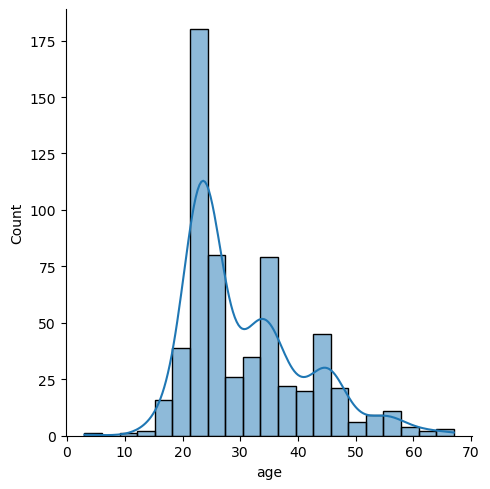

In [41]:
sns.displot(data['age'],kde=True)

In [36]:
AGE = data['Age_Category'].value_counts().reset_index()
AGE.columns=['Age_Category','count']
fig1 = px.pie(data_frame=AGE, names=AGE['Age_Category'], values=AGE['count'], labels=AGE['Age_Category'])
fig1.update_layout( 
    height=450,
    width=600,
    showlegend=True,  
    title="Sales distribution by age category:",
    title_font_size=22,title_x = 0.5)
fig1.show()

In [38]:
Time_status= data['Time_Status'].value_counts().reset_index()
Time_status.columns=['Time_Status','count']
fig = px.pie(data_frame=Time_status ,names= Time_status['Time_Status'] , values= Time_status['count'],hover_name=Time_status['Time_Status'],title ='Sales distribution by Time segments:')
fig.update_layout(height = 450 , width = 600 , title_font_size = 20 , title_x = 0.5)
fig.show()


 #### **Observations:**
- The distribution shows a sharp peaking at the age of 23. This suggests that teenagers are more frequent buyers compared to existing customers.
 
- The top three age categories, Young Adult, Adult, and Middle-Aged Adult, contribute 95% of the total sales, followed by Minors and Senior Citizens.

- The largest percentage (65.3 %) of consumers prefer shopping in Night , followed by Evening with 15.4% , Afternoon with 14.6% and Morning with 4.65 % respectively.

 <center>
    <h3>3. On Basis Of Rating and Review</h3>
   </center>


In [39]:
print("Average rating :--", round(data['Shopping_Satisfaction'].mean() , 2))

Average rating :-- 2.46


In [51]:
data['Rating_Accuracy '].value_counts()


3    288
2    179
1     58
4     56
5     21
Name: Rating_Accuracy , dtype: int64

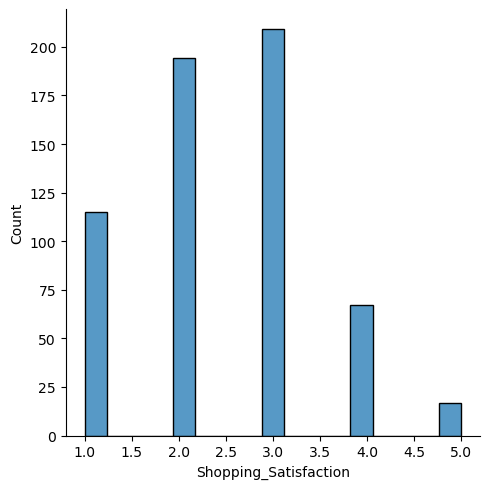

In [43]:
sns.displot(data['Shopping_Satisfaction'])


In [50]:
data['Shopping_Satisfaction'].value_counts()


3    209
2    194
1    115
4     67
5     17
Name: Shopping_Satisfaction, dtype: int64

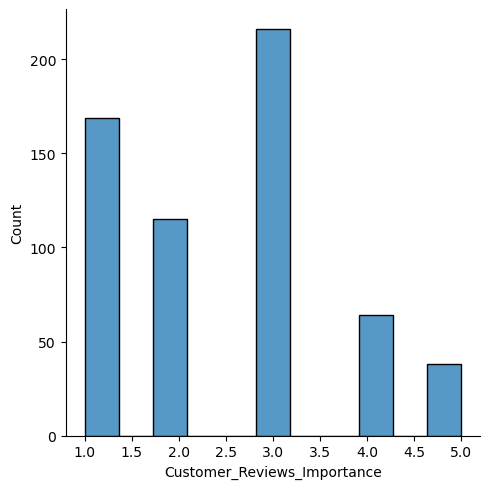

In [45]:
sns.displot(data['Customer_Reviews_Importance'])


In [48]:
service_appreciation_counts = data['Service_Appreciation'].value_counts().reset_index()
service_appreciation_counts.columns = ['Service_Appreciation', 'Count']
fig = px.pie(
    data_frame=service_appreciation_counts,
    names='Service_Appreciation',
    values='Count',
    hover_name='Service_Appreciation',
    title='Analyzing Service Appreciation Factors:'
)
fig.update_layout(
    height=450,
    width=600
)
fig.show()


In [47]:
improvement_areas_counts = data['Improvement_Areas'].value_counts().reset_index()
improvement_areas_counts.columns = ['Improvement_Areas', 'Count']
fig = px.bar(
    data_frame=improvement_areas_counts,
    x='Improvement_Areas',
    y='Count',
    title='Improvement Areas Distribution:'
)
fig.update_layout(
    height=600,
    width=900,
    plot_bgcolor='lightgrey',
    title_font_size=18
)

fig.show()



 #### **Observations:**
- The overall rating given by customers is low, averaging at 2.46. The majority of users (34.71%) rated it as 3, followed by 32.22% who rated it as 2. A smaller percentage of users rated it as 1 (19.1%), while 11.12% and 2.8% of users rated it as 4 and 5, respectively.
 
- Product recommendations , Competitive Price and Wide Product section are the top 3 appreceation factors with 185 , 182 and 150 votes respectively.

- Customer service , Product Quality and Package waste reduction are the top 3 feedback that need to be improve.

<center>
    <h3>4. On the Basis of Customer Behavior</h3>
<center>        

In [53]:
cart_completion_counts = data['Cart_Completion_Frequency'].value_counts().reset_index()
cart_completion_counts.columns = ['Cart_Completion_Frequency', 'Count']
fig = px.pie(
    data_frame=cart_completion_counts,
    names='Cart_Completion_Frequency',
    values='Count',
    title="Amazon Customer's Cart Completion Frequency:"
)
fig.update_layout(
    height=450,
    width=600
)
fig.show()


#### <div style="background-color:lightblue; padding:10px;">  More than half of customers complete their carts sometimes, followed by 26% who complete their carts often. 12% of consumers complete their carts rarely, and only 7.81% of customers always complete their carts. </div>

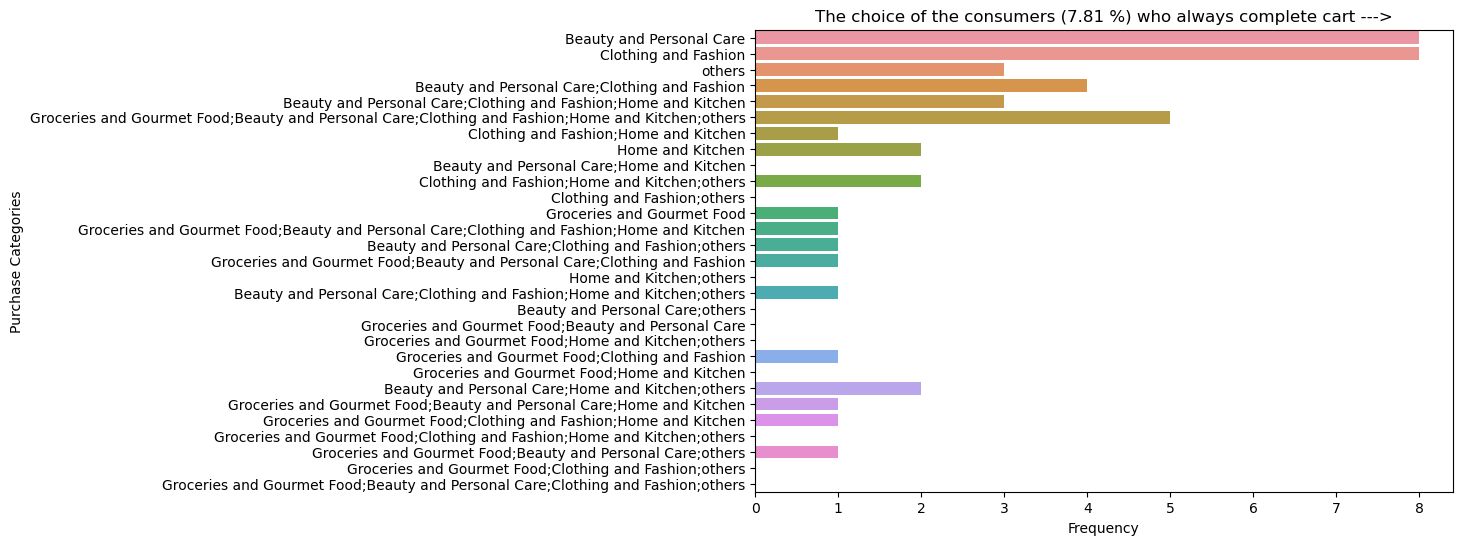

In [54]:
plt.figure(figsize=(9,6))
sns.countplot(y='Purchase_Categories', data=data.loc[data['Cart_Completion_Frequency'] == 'Always',:], order=data['Purchase_Categories'].value_counts().index)
plt.title('The choice of the consumers (7.81 %) who always complete cart --->')
plt.xlabel('Frequency')
plt.ylabel('Purchase Categories')
plt.show()


 #### **Observations:**
- More than half of customers complete their carts sometimes, followed by 26% who complete their carts often. 12% of consumers complete their carts rarely, and only 7.81% of customers always complete their carts
 
- Beauty and Personal Care' and 'Clothing and Fashion' are the highest retention rates among the 7.81% of repeat customers who always complete their cart.
